In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as plt_ex

In [2]:
datasetUsersCSVPath  = "./dataset/users.csv"

In [3]:
%%time
df_users = pd.read_csv(datasetUsersCSVPath, sep=',', index_col=0)

CPU times: user 18.4 ms, sys: 3.56 ms, total: 21.9 ms
Wall time: 21.4 ms


In [4]:
# Make all the strings lower case and trim leading and trailing spaces
df_users = df_users.applymap(lambda x:x.lower().strip() if type(x) == str else x)
df_users = df_users.replace(r"\s{2,}", " ", regex=True)

In [5]:
df_users[df_users.name.isna()]

,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


In [6]:
len(df_users[df_users.name == "unknown"])

0

In [7]:
df_users.loc[df_users.name.isna(), "name"] = "unknown"

## Lang

In [8]:
uniqueLanguages = df_users.lang.unique()
print("Languages:", uniqueLanguages)
print(len(uniqueLanguages), "unique languages")
print(df_users.lang.isna().sum(), "missing languages")

Languages: ['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-au' 'da' 'ar' 'select language...' 'zh-cn' 'pl' 'el' 'fil' 'sv'
 'xx-lc']
24 unique languages
0 missing languages


In [9]:
languages_count = df_users.lang.value_counts()
invalidLanguageUsers = languages_count['select language...'] + languages_count['xx-lc']
print("There are 2 invalid languages, 'Select Language...' and 'xx-lc'. There is a total of", invalidLanguageUsers, "users with invalid entries")

There are 2 invalid languages, 'Select Language...' and 'xx-lc'. There is a total of 3 users with invalid entries


In [10]:
df_users[df_users.lang == 'select language...']

,name,lang,bot,created_at,statuses_count
id,,,,,
2956613720,leanne arker,select language...,0,2020-01-05 00:09:59,57.0
2904858613,brooke,select language...,0,2019-11-22 05:44:46,85.0


In [11]:
df_users[df_users.lang == 'xx-lc']

,name,lang,bot,created_at,statuses_count
id,,,,,
29552151,chloe,xx-lc,0,2014-04-09 21:36:02,15398.0


In [12]:
df_users.loc[df_users.lang == 'select language...', "lang"] = "en"
df_users.loc[df_users.lang == 'xx-lc', "lang"] = "en"

In [13]:
print(df_users[df_users.index == 29552151])
print(df_users[df_users.index == 2956613720])
print(df_users[df_users.index == 2904858613])

           name lang  bot           created_at  statuses_count
id                                                            
29552151  chloe   en    0  2014-04-09 21:36:02         15398.0
                    name lang  bot           created_at  statuses_count
id                                                                     
2956613720  leanne arker   en    0  2020-01-05 00:09:59            57.0
              name lang  bot           created_at  statuses_count
id                                                               
2904858613  brooke   en    0  2019-11-22 05:44:46            85.0


In [14]:
df_users.loc[df_users.lang == 'en-gb', "lang"] = "en"
df_users.loc[df_users.lang == 'en-au', "lang"] = "en"
df_users.loc[df_users.lang == 'zh-cn', "lang"] = "zh"
df_users.loc[df_users.lang == 'zh-tw', "lang"] = "zh"

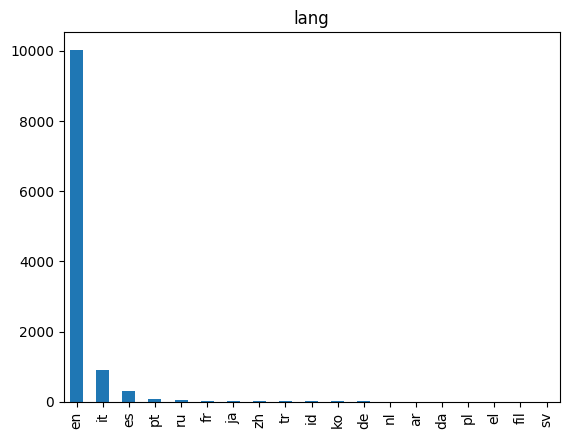

In [15]:
df_users.lang.value_counts().plot(kind='bar', title='lang') 
plt.show()

In [16]:
#real_users = df_users[df_users.bot == 0]
#bots       = df_users[df_users.bot == 1]

## Created_at

In [17]:
df_users.created_at = pd.to_datetime(df_users.created_at, format='%Y-%m-%d %H:%M:%S')
df_users.dtypes

name                      object
lang                      object
bot                        int64
created_at        datetime64[ns]
statuses_count           float64
dtype: object

## Statuses_count

In [18]:
print(df_users.statuses_count.isna().sum(), "missing statuses_count values")

399 missing statuses_count values


In [27]:
df_users[df_users.statuses_count.isna()].head()

,name,lang,bot,created_at,statuses_count
id,,,,,
616225564,anisha williams,en,0,2017-06-25 15:49:36,NaN
1370348599,robert brown,en,0,2018-04-23 19:05:48,NaN
617369459,sage pennington,en,0,2017-06-26 18:50:48,NaN
2362195375,delaine nock,en,0,2019-02-28 05:35:38,NaN
2351047069,tosha pacitti,en,0,2019-02-21 03:14:40,NaN


In [44]:
print("With missing values")
df_users.describe()

With missing values


,bot,statuses_count
count,11508.000000,11109.000000
mean,0.531456,5883.312359
std,0.499031,19073.007305
min,0.000000,0.000000
25%,0.000000,41.000000
50%,1.000000,68.000000
75%,1.000000,2916.000000
max,1.000000,399555.000000


In [45]:
df_users_copy = df_users.copy()
df_users_copy.loc[df_users.statuses_count.isna(), "statuses_count"] = 5883
print(df_users_copy.statuses_count.apply(float.is_integer).sum(), "integers")
df_users_copy.statuses_count = df_users_copy.statuses_count.astype(int)

11508 integers


In [39]:
df_users_copy.loc[616225564, "statuses_count"]

5883

In [43]:
print("Without missing values")
df_users_copy.describe()

Without missing values


,bot,statuses_count
count,11508.000000,11508.000000
mean,0.531456,5883.301529
std,0.499031,18739.416078
min,0.000000,0.000000
25%,0.000000,42.000000
50%,1.000000,71.000000
75%,1.000000,4318.000000
max,1.000000,399555.000000


<AxesSubplot: >

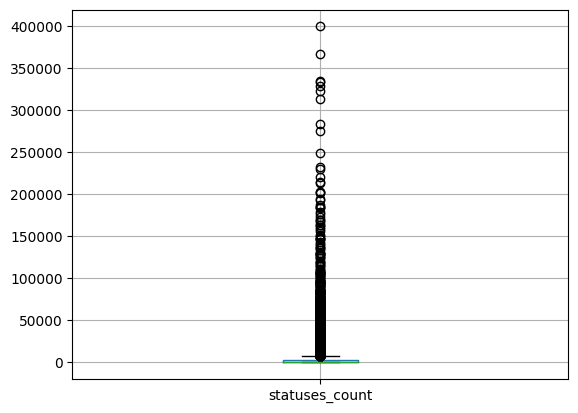

In [59]:
df_users.boxplot(column='statuses_count')

In [69]:
Q1 = df_users.statuses_count.quantile(0.25)
Q3 = df_users.statuses_count.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
print(Q3 + 1.5 * IQR, Q1 - 1.5 * IQR)

filter = (df_users.statuses_count >= Q1 - 1.5 * IQR) & (df_users.statuses_count <= Q3 + 1.5 * IQR)
statuses_count_valid = df_users.loc[filter]
filter = (df_users.statuses_count < Q1 - 1.5 * IQR) | (df_users.statuses_count > Q3 + 1.5 * IQR)
statuses_count_outliers = df_users.loc[filter]

7228.5 -4271.5


In [58]:
statuses_count_valid.describe()

,bot,statuses_count
count,9029.000000,9029.000000
mean,0.628530,582.452099
std,0.483224,1357.807664
min,0.000000,0.000000
25%,0.000000,34.000000
50%,1.000000,57.000000
75%,1.000000,150.000000
max,1.000000,7226.000000


In [63]:
statuses_count_outliers.describe()

,bot,statuses_count
count,2080.000000,2080.000000
mean,0.212019,28893.633173
std,0.408837,35831.394074
min,0.000000,7236.000000
25%,0.000000,11302.500000
50%,0.000000,15987.000000
75%,0.000000,32103.000000
max,1.000000,399555.000000


<AxesSubplot: >

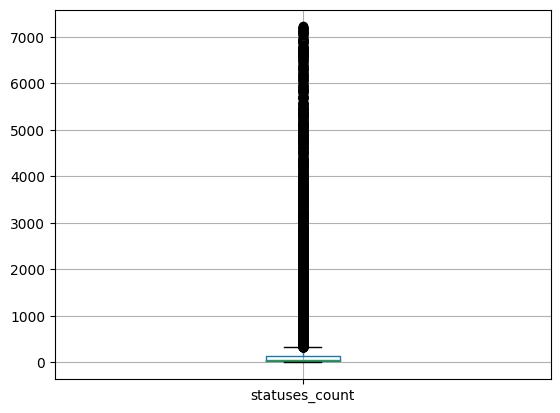

In [61]:
statuses_count_valid.boxplot(column='statuses_count')

<AxesSubplot: >

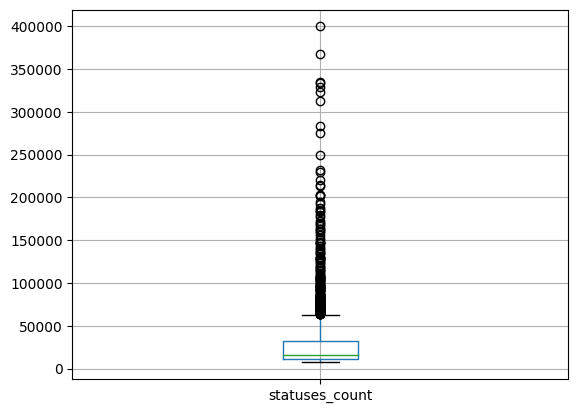

In [64]:
statuses_count_outliers.